[View in Colaboratory](https://colab.research.google.com/github/calicinio/Testando/blob/master/Exerc%C3%ADcio_Computacional_III_Clustering_solu%C3%A7%C3%A3o.ipynb)

In [0]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math
import time
import matplotlib.gridspec as gridspec
from matplotlib import cm
from IPython import display
from sklearn.datasets import make_classification
from sklearn.cluster import KMeans
from sklearn.datasets import load_sample_image
from sklearn.cluster import MiniBatchKMeans
import scipy.spatial.distance as sc

## Exercício 1

Implemente o algoritmo k-means, como visto em sala de aula.

O algoritmo recebe como argumentos:

* a matriz de observações $X$ de dimensão $n \times d$, em que $n$ corresponde ao número de observações e $d$ a dimensão de cada observação;
* o número de grupos a serem estimados, $k$;
* um limiar $\epsilon$ utilizado no critério de parada do algoritmo (utilize o valor *default*);
* um número máximo de iterações, *max_iter*, para garantir que o algoritmo pare, caso o critério de parada não seja atingido


In [0]:
def kmeans(X, k, epsilon = 1e-8, max_iter = 50, plotar = False):
  n,d = X.shape
  
  # PASSO 1 - Escolha k centros a partir de padrões aleatórios e armazene na matriz
  # center, de dimensoes kxd
  center = np.random.normal(np.mean(X), 0.8, [k,d])
  media_temp = np.zeros(d)

  # Matriz de distancias de dimensao nxk
  dist = np.zeros((n,k))

  group_idx = np.ones(n)
  dist_obj = np.zeros(n)

  plt.figure(figsize=(15,5))
  if (d==2):
    gs = gridspec.GridSpec(1,2)
  oldJ = 0

  iteration = 0
  j_vec = np.zeros(max_iter+1)
  while (iteration < max_iter):

    # PASSO 2 - Associe cada amostra ao grupo mais próximo
    # - Calcula a distância entre as amostras e os centros dos grupos e armazena na matriz dist
    #<SEU CODIGO AQUI>        
    dist = sc.cdist(X, center, 'euclidean')
    dist[np.isnan(dist)] = 0
    #print dist

    # - Encontra o centro de grupo mais próximo de cada amostra e armazena no vetor group_idx de tamanho n
    group_idx = np.argmin(dist, axis=1)

    # PASSO 3 - Recalcule os centros dos grupos a partir do novo partcionamento
    #  das amostras e armazene o resultado na  matriz center
    for i in range(0, k):
      for j in range(0, d):
        #tiro a média de todos o valores para cada centr      
        valor_medio = np.mean(X[group_idx == i, j])
        if np.isnan(valor_medio):
          center[i, j] = 0
        else:
          center[i, j] = valor_medio

    # PASSO 4 - Pare se o critério de convergência foi atingido, caso contrário 
    # vá para o Passo 2
    # - Calcula a função objetivo e armazene no escalar J        
    for i in range(0, k):
      pts_grupo = X[np.where(group_idx == i)]
      dist_obj[i] = np.sum(np.sum((pts_grupo - center[i])**2))

    J = np.sum(dist_obj)

    j_vec[iteration] = J
  
    if plotar:
      ## PLOTA OS RESULTADOS PARCIAIS        
      if (d==2):

        plt.subplot(gs[0])
        plt.cla()
        plt.scatter(X[:,0],X[:,1], c=group_idx+1)
        plt.plot(center[:,0],center[:,1], 'r<', markersize=10)
        plt.title('Iteration: %d'%(iteration))

        plt.subplot(gs[1])

      plt.cla()
      plt.plot(j_vec[:iteration])
      plt.title('Iteration: %d - J = %.4f'%(iteration,J))

      display.clear_output(wait=True)
      display.display(plt.gcf())           


    # - Checa se a variação na função objetivo foi significativa
    if (np.linalg.norm(J-oldJ) <= epsilon):
        break;

    oldJ = J

    iteration = iteration + 1        
      
  display.clear_output(wait=True)
  return center, group_idx, J

Valide seu algoritmo com o código abaixo.

Veja que o *k-means* nem sempre converge para um ponto de mínimo global da função a ser otimizada, ou seja, em algumas
execuções os grupos encontrados não são ótimos.

Descreva uma possível solução para resolver este problema.


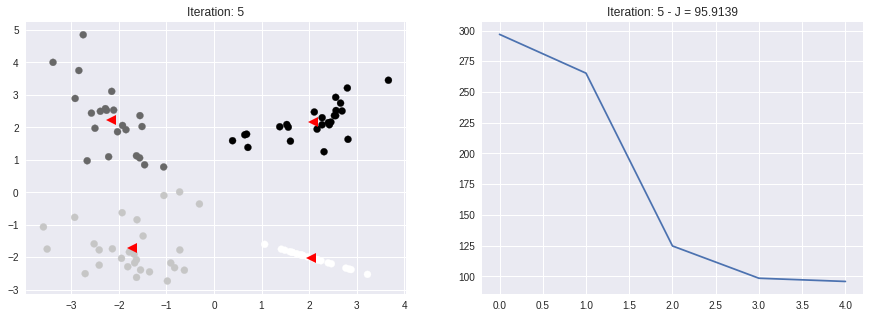

In [14]:
X,_ = make_classification(n_samples= 100, n_features=2, n_classes = 4, n_clusters_per_class=1, 
                          n_informative=2, n_redundant=0, n_repeated=0,
                         class_sep = 2)
centers, gi, J = kmeans(X,k=4, plotar = True)

## Exercício 2

Nesse exercício iremos realizar uma quantização das cores (https://en.wikipedia.org/wiki/Color_quantization) de uma imagem utilizando agrupamento.

Dado uma imagem representada como uma combinação de 256 possíveis valores de intensidade para vermelho, verde e e azul (RGB), iremos
reduzir o número cores para representar a imagem utilizando o algoritmo *k-means*. O número de cores resultantes será igual ao número de grupos a serem encontrados $k$.

Para isso você deve realizar os seguintes passos:

1. Ler as matrizes de cores vermelho, verde e azul (RGB) da imagem de entrada. O conteúdo da imagem será armazenado em uma matriz *I* de dimensões $w\times h \times 3$, onde 3 corresponde aos três canais de cor e $w$ e $h$ às dimensões horizontais e verticais da imagem (necessário para utilizar a função *plt.imshow*)
2. Converter os valores de cada canal de cor originalmente na faixa [0,255] para [0,1]
3. Converter a matriz $I$  em uma matriz $X$ de dimensões $wh \times 3$. Cada linha dessa matriz corresponde aos valores vermelho, verde e azul de cada pixel da imagem (dica: utilize a funçao np.reshape)
4. Realizar o agrupamento dos dados a partir da matriz $X$, obtendo os centros e o índice do grupo para cada pixel
5. Converter a matriz $X$ em uma matriz $V$ de dimensões $3 \times w \times h$. Essa matriz tem as mesmas dimensões da matriz $I$, porém o valor original RGB de cada pixel deve ser substituído pelo valor RGB do centro do grupo correspondente

Tempo gasto: 13.5769939423


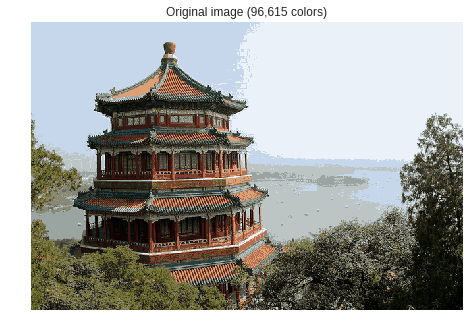

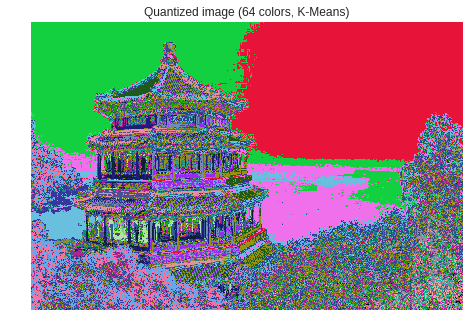

In [10]:
k = 64

# Passo 1 - Carrega a imagem original
I = load_sample_image("china.jpg")

# Passo 2 - Converter os valores para [0,1]
I = np.array(I, dtype=np.float64) / 255

# Passo 3 - Converter I em X (utilize a função np.reshape)
X = I.reshape(I.shape[0] * I.shape[1], 3)

# Passo 4 - Realizar o agrupamento dos dados utilizando o algoritmo k-means
timeIni = time.time()
centers, gi, J = kmeans(X,k)
timeFim = time.time()

print "Tempo gasto: " + str(timeFim - timeIni)

# Passo 5 - Converter X em V substituindo os valores RGB originais de cada pixel pelo valor RGB do centro correspondente
for i in range(k):
  X[gi == i,:] = centers[i]

V = X.reshape(I.shape[0], I.shape[1], 3)
V = np.array(V, dtype=np.float) * 255

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(I)

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (%d colors, K-Means)'% k)
plt.imshow(V)

## Exercício 3'

A solução implementada resolve o problema, porém tem uma alta complexidade computacional. 

A biblioteca *scikit-learn* possui uma implementação do algoritmo *k-means* otimizada (http://scikit-learn.org/stable/modules/clustering.html#k-means). Um exemplo de otimização é 
a utilização do algoritmo *k-means++* para inicializar os centros dos grupos.

Refaça o exercício anterior utilizando a implementação da biblioteca *scikit-learn* e avalie se existe algum ganho de desempenho.

Tempo gasto: 81.078993082


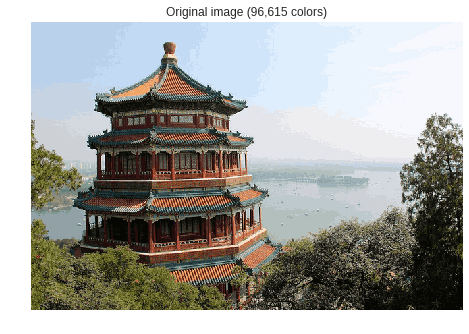

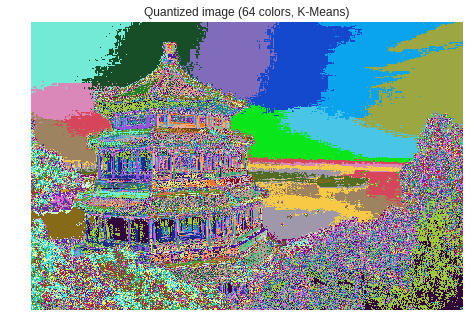

In [12]:
k = 64

# Passo 1 - Carrega a imagem original
I = load_sample_image("china.jpg")

# Passo 2 - Converter os valores para [0,1]
I = np.array(I, dtype=np.float64) / 255

# Passo 3 - Converter I em X (utilize a função np.reshape)
X = I.reshape(I.shape[0] * I.shape[1], 3)

# Passo 4 - Realizar o agrupamento dos dados utilizando o algoritmo k-means da biblioteca scikit-learn
timeIni = time.time()
model = KMeans(n_clusters=k, verbose=0, max_iter=50).fit(X)
timeFim = time.time()

print "Tempo gasto: " + str(timeFim - timeIni)

# Passo 5 - Converter X em V substituindo os valores RGB originais de cada pixel pelo valor RGB do centro correspondente
for i in range(k):
  X[model.labels_ == i,:] = model.cluster_centers_[i]

V = X.reshape(I.shape[0], I.shape[1], 3)
V = np.array(V, dtype=np.float) * 255

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(I)

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (%d colors, K-Means)'% k)
plt.imshow(V)

## Exercício 4

A biblioteca *scikit-learn* também possui uma variação do algoritmo *k-means* denominada *Mini Batch k-means* que reduz significativamente
o custo computacinal do algoritmo original (http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans). 
O princípio dete algoritmo é similar ao algoritmo *mini-batch gradient descent*.

Leia o artigo abaixo descreva com suas palavras os princípios desse algoritmo.
## --------------------------------------------------------------
### Resposta

O Mini Batch k-means utiliza amostragem dos dados para poder calcular o valores de cada centro. Com isso ele consegue reduzir o custo computacional do método em comparação com o k-means.

Similiar ao k-means, ele inicia escolhendo aleatoriamente do conjunto de dados de entrada um quantidade $\beta$ de amostras, ao qual ela chama de *mini-batchs*. A partir da segunda iteração utiliza-se os valores médios dos *mini-batchs* anteriores e atual para achar os novos centroídes. Este processo é repetido até atingir os critérios de parada.
## --------------------------------------------------------------

Em seguida, refaça o exercício 2 utilizando este algoritmo.


Tempo gasto: 3.91598796844


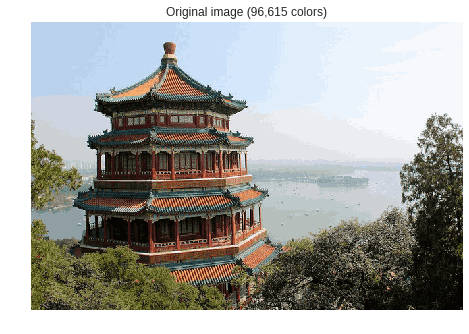

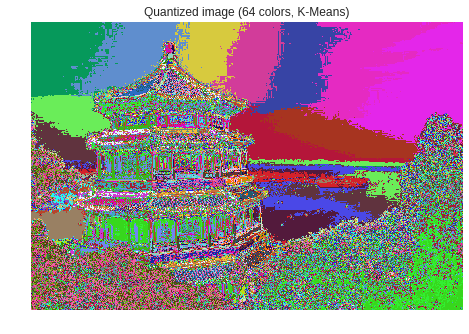

In [13]:

from sklearn.datasets import load_sample_image

k = 64

# Passo 1 - Carrega a imagem original
I = load_sample_image("china.jpg")

# Passo 2 - Converter os valores para [0,1]
I = np.array(I, dtype=np.float64) / 255

# Passo 3 - Converter I em X (utilize a função np.reshape)
X = I.reshape(I.shape[0] * I.shape[1], 3)

# Passo 4 - Realizar o agrupamento dos dados utilizando o algoritmo k-means da biblioteca scikit-learn
timeIni = time.time()
model = MiniBatchKMeans(n_clusters=k, verbose=0, max_iter=50).fit(X)
timeFim = time.time()

print "Tempo gasto: " + str(timeFim - timeIni)

# Passo 5 - Converter X em V substituindo os valores RGB originais de cada pixel pelo valor RGB do centro correspondente
for i in range(k):
  X[model.labels_ == i,:] = model.cluster_centers_[i]

V = X.reshape(I.shape[0], I.shape[1], 3)
V = np.array(V, dtype=np.float) * 255

plt.figure(2)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(I)

plt.figure(3)
plt.clf()
ax = plt.axes([0, 0, 1, 1])
plt.axis('off')
plt.title('Quantized image (%d colors, K-Means)'% k)
plt.imshow(V)